In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
data = pd.read_csv("retail_raw_reduced.csv")
data.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,2019-10-17,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10,740000
1,1706815,2019-10-24,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2,604000
2,1710718,2019-11-03,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8,1045000
3,1683592,2019-08-19,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4,205000
4,1702573,2019-10-16,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2,4475000


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   order_id     5000 non-null   int64 
 1   order_date   5000 non-null   object
 2   customer_id  5000 non-null   int64 
 3   city         5000 non-null   object
 4   province     5000 non-null   object
 5   product_id   5000 non-null   object
 6   brand        5000 non-null   object
 7   quantity     5000 non-null   int64 
 8   item_price   5000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 351.7+ KB


In [38]:
import datetime
data['order_month'] = data['order_date'].apply(lambda x:
datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
print(data.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


Penambahan kolom order_month pada dataset

Ada beberapa function yang berperan di sini:
1. apply & lambda digunakan untuk membuat kolom baru, berdasarkan suatu kolom lain yang sudah ada (misal .apply(lambda x: x*2) berarti setiap input x di dalam kolom, akan diubah menjadi x*2). Dalam hal ini kolom yang sudah ada adalah dataset[‘order_date’], lalu tiap nilai di dalamnya kita proses agar menjadi month-nya saja.
2. Function datetime.datetime.strptime digunakan untuk mengubah date/time dalam bentuk string menjadi tipe data datetime.
3. Function strftime digunakan untuk mengubah format suatu data bertime datetime, dalam hal ini diubah menjadi ‘%Y-%m’, yang berarti outputnya adalah waktu dengan bentuk YYYY-MM atau tahun dan bulan saja, tanggalnya sudah tidak ada. 



In [39]:
data['gmv'] = data['item_price']*data['quantity']
print(data.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


Penambahan kolom gmv pada dataset dengan cara melakukan operasi perkalian setiap entri di kolom item_price dan kolom quantity.

---


Catatan : gmv adalah Gross Merchandise Value atau total uang yang dibayarkan customer.

In [40]:
monthly_amount = data.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


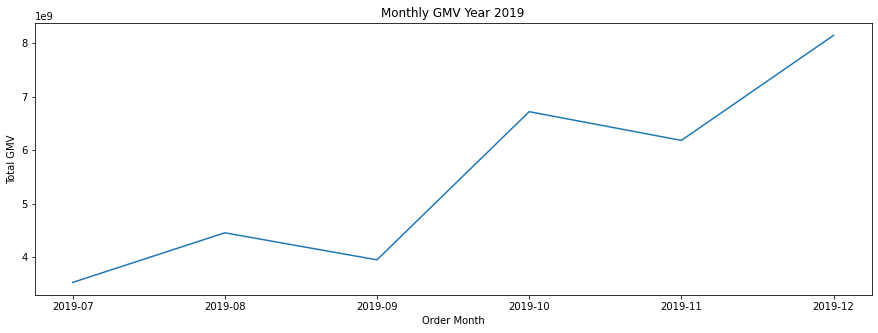

In [41]:
plt.figure(figsize=(15,5))
data.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

In [42]:
data['order_date'].unique()

array(['2019-10-17', '2019-10-24', '2019-11-03', '2019-08-19',
       '2019-10-16', '2019-07-16', '2019-11-04', '2019-09-26',
       '2019-12-30', '2019-11-24', '2019-09-19', '2019-10-29',
       '2019-10-21', '2019-12-18', '2019-08-05', '2019-07-04',
       '2019-11-11', '2019-07-07', '2019-12-13', '2019-09-11',
       '2019-10-31', '2019-07-10', '2019-10-07', '2019-10-15',
       '2019-11-26', '2019-11-19', '2019-11-22', '2019-07-25',
       '2019-11-01', '2019-10-22', '2019-09-09', '2019-12-02',
       '2019-12-29', '2019-11-12', '2019-10-01', '2019-12-19',
       '2019-08-18', '2019-09-05', '2019-11-14', '2019-11-21',
       '2019-12-03', '2019-10-25', '2019-12-10', '2019-07-05',
       '2019-12-05', '2019-10-10', '2019-12-12', '2019-10-08',
       '2019-11-29', '2019-10-11', '2019-09-06', '2019-12-26',
       '2019-12-11', '2019-10-23', '2019-11-27', '2019-10-03',
       '2019-12-22', '2019-08-13', '2019-11-05', '2019-10-06',
       '2019-07-26', '2019-08-11', '2019-09-25', '2019-

In [43]:
latest_date = '2019-09-24'
data[data['order_date']==latest_date]

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price,order_month,gmv
1649,1694248,2019-09-24,12708,Denpasar,Bali,P2762,BRAND_P,12,590000,2019-09,7080000
1920,1694251,2019-09-24,17690,Jakarta Selatan,DKI Jakarta,P3216,BRAND_S,6,1325000,2019-09,7950000
2248,1694248,2019-09-24,12708,Denpasar,Bali,P0171,BRAND_A,4,1325000,2019-09,5300000
2472,1694551,2019-09-24,17298,Jakarta Timur,DKI Jakarta,P0063,BRAND_A,3,1045000,2019-09,3135000
2511,1694257,2019-09-24,16126,Jakarta Barat,DKI Jakarta,P0122,BRAND_A,36,590000,2019-09,21240000
2616,1694401,2019-09-24,14108,Jakarta Pusat,DKI Jakarta,P0605,BRAND_B,8,800000,2019-09,6400000
3036,1694257,2019-09-24,16126,Jakarta Barat,DKI Jakarta,P3596,BRAND_S,21,1745000,2019-09,36645000
3440,1694527,2019-09-24,16133,Jakarta Pusat,DKI Jakarta,P0770,BRAND_C,36,639000,2019-09,23004000
4124,1694539,2019-09-24,14507,Jakarta Pusat,DKI Jakarta,P0255,BRAND_A,8,604000,2019-09,4832000
4353,1694548,2019-09-24,17675,Jakarta Pusat,DKI Jakarta,P3255,BRAND_S,3,1745000,2019-09,5235000


In [44]:
unique_cities = data[data.gmv>0]['city'].unique()
unique_cities.sort()
unique_cities

array(['Bandung', 'Bekasi', 'Bogor', 'Denpasar', 'Depok', 'Jakarta Barat',
       'Jakarta Pusat', 'Jakarta Selatan', 'Jakarta Timur',
       'Jakarta Utara', 'Malang', 'Purwokerto', 'Semarang', 'Surabaya',
       'Surakarta', 'Tangerang', 'Ubud', 'Yogyakarta'], dtype=object)

In [45]:
city_gmv = []
for i in unique_cities:
  city_gmv.append(data[data.gmv>0][data['city']==i][data['order_date']==latest_date].gmv.sum())

<ipython-input-45-ba6ba35097f2>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  city_gmv.append(data[data.gmv>0][data['city']==i][data['order_date']==latest_date].gmv.sum())


In [46]:
print(set(zip(unique_cities, city_gmv)))

{('Bogor', 0), ('Surabaya', 0), ('Jakarta Pusat', 39471000), ('Depok', 0), ('Jakarta Utara', 0), ('Bandung', 0), ('Bekasi', 0), ('Tangerang', 0), ('Jakarta Selatan', 7950000), ('Jakarta Barat', 57885000), ('Jakarta Timur', 3135000), ('Semarang', 0), ('Ubud', 0), ('Malang', 0), ('Surakarta', 0), ('Yogyakarta', 0), ('Purwokerto', 0), ('Denpasar', 12380000)}


In [47]:
unique_provinces = data['province'][data.gmv>1].unique()
unique_provinces

array(['DKI Jakarta', 'Jawa Tengah', 'Banten', 'Bali', 'Jawa Timur',
       'Jawa Barat', 'Yogyakarta'], dtype=object)

In [49]:
province_gmv = []
for i in unique_provinces:
  province_gmv.append(data[data.gmv>1][data['province']==i][data['order_date']==latest_date].gmv.sum())

<ipython-input-49-cf23c2599de9>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  province_gmv.append(data[data.gmv>1][data['province']==i][data['order_date']==latest_date].gmv.sum())


In [50]:
print(set(zip(unique_provinces, province_gmv)))

{('Jawa Timur', 0), ('DKI Jakarta', 108441000), ('Banten', 0), ('Jawa Barat', 0), ('Jawa Tengah', 0), ('Yogyakarta', 0), ('Bali', 12380000)}


In [51]:
nan_indices = []
for i in range(len(unique_provinces)):
  if type(unique_provinces[i])==float:
    nan_indices.append(i)

In [52]:
unique_provinces = list(unique_provinces)
province_gmv = list(province_gmv)

In [53]:
for i in nan_indices:
  unique_provinces.pop(i)
  province_gmv.pop(i)

unique_provinces

['DKI Jakarta',
 'Jawa Tengah',
 'Banten',
 'Bali',
 'Jawa Timur',
 'Jawa Barat',
 'Yogyakarta']

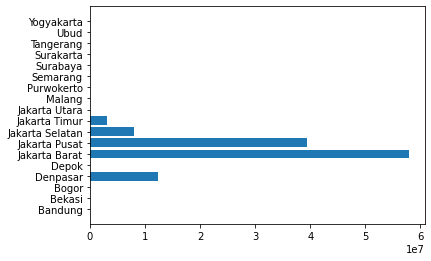

In [54]:
plt.barh(unique_cities, city_gmv)
plt.show()

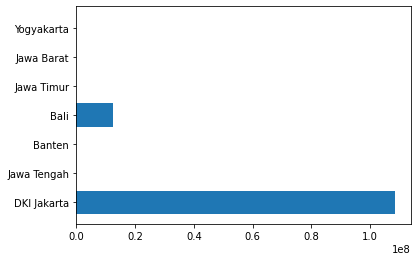

In [55]:
plt.barh(unique_provinces, province_gmv)
plt.show()

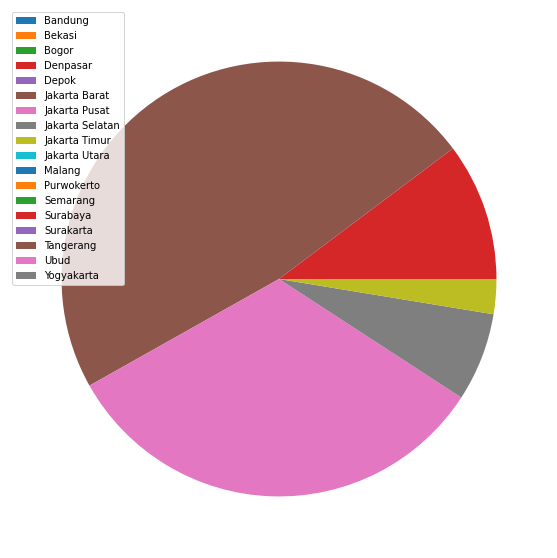

In [56]:
plt.figure(figsize=(10,10))
plt.pie(city_gmv)
plt.legend(unique_cities, loc='best')
plt.show()

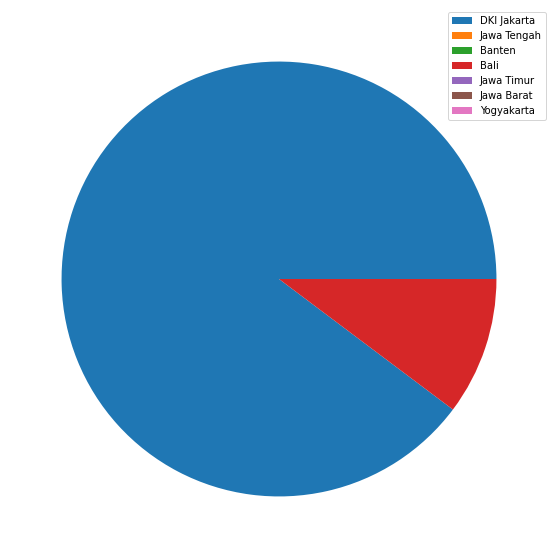

In [57]:
plt.figure(figsize=(10,10))
plt.pie(province_gmv)
plt.legend(unique_provinces, loc='best')
plt.show()